In [122]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

Your Name and PRN:
- Name : Chirag Sharma
- PRN  : 250840128015
- Date : 13-Nov-25

# Deep Neural Networks

## Assignment: A03
### Take Neural Network implementation with:
- One hidden layer 
- ${Tanh}$ activation function


### Assignment - Answer all Questions
- **Q1**: Is this model more accurate compared to previous model?
- **Q2**: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.

|#|Dimension of hidden layer|Learning rate|Training Accuracy|Test Accuracy|Comment|
|:-:|:-:|:-:|:-:|:-:|:--|
|1|4|0.1|0.97|0.96|Base case||1|4|0.1|0.97|0.96|Base case|
|2|1|1|???|???|???|
|3|2|0.01|...|...|...|
|4|3|...|...|...|...|
|5|...|...|...|...|...|
|6|...|...|...|...|...|

- **Q3**: What lines will you change to convert it into multi-class prediction model?
- **Q4**: How many epochs are sufficient?

In [123]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections.abc import Callable
from typing import Literal

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [124]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input' 
# inpDir = Path('..') / '..' / 'input'
# # outDir = '../output'
# outDir = Path('..') / 'output'


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE  = 0.2 # Size of test data

NOISE = 0.2
N_SAMPLE = 1000
EPOCHS = 20001
ALPHA = 0.1


# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')


# numpy random set
rng = np.random.default_rng(seed=RANDOM_STATE)

In [ ]:
# softmax function
def fn_softmax(z: np.ndarray) -> float:
    exp_score = np.exp(z - np.max(z))
    return exp_score/np.sum(exp_score, axis=1, keepdims=True)

In [ ]:
# tanh function
def fn_activ(z):
    return np.tanh(z)

# tanh function derivative
def fn_activ_prime(z):
    return 1.0 - np.tanh(z)**2

 Input ->  Hidden layer (tanh) ->  output (softmax)

In [ ]:
# loss function
def calculate_loss(model, X_l, y_l):
    # model parameters
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']

    m = X_l.shape[0] # number of rows

    # First Layer
    z1 = X_l.dot(W1) + b1 # aggregation
    a1 = fn_activ(z1) # activation

    # Last Layer
    z2 = a1.dot(W2) + b2 # aggregation
    a2 = fn_softmax(z2) # activation

    data_loss = -(y_l * np.log(a2) + (1-y_l) * np.log(1-a2)).sum() # loss function
    return data_loss/m

In [ ]:
# prediction function
def predict(model, X_p):
    # model parameters
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']

    # First Layer
    z1 = X_p.dot(W1) + b1 # aggregation
    a1 = fn_activ(z1) # activation

    # Last Layer
    z2 = a1.dot(W2) + b2 # aggregation
    a2 = fn_softmax(z2) # activation

    return a2.argmax(axis=1)

In [ ]:
# function to build model according to given parameters
def build_model(param, train_x, train_y, test_x, test_y, alpha, n_epoch, hist):
    m = train_x.shape[0] # number of rows

    # initializing weights of layers with random values according to dimensions
    W1 = rng.random((param['h_dim'][0], param['h_dim'][1])) / np.sqrt(param['h_dim'][0])
    W2 = rng.random((param['h_dim'][1], param['h_dim'][2])) / np.sqrt(param['h_dim'][1])

    # initializing biases of layers with random values according to dimensions
    b1 = np.zeros((1,param['h_dim'][1]))
    b2 = np.zeros((1,param['h_dim'][2]))

    # lists to track losses and accuracy
    loss, epoch, test_loss = [], [], [] 
    train_accuracy, test_accuracy = [], []

    # looping over epochs
    for i in range(n_epoch):
        # Forward Propagation
        # first layer
        z1 = train_x.dot(W1) + b1 # aggregation
        a1 = fn_activ(z1) # activation

        # last layer
        z2 = a1.dot(W2) + b2 # aggregation
        a2 = fn_softmax(z2) # activation

        # --------------------
        # Backpropagation
        
    # LAST LAYER
        dz2 = a2 - train_y
        assert(z2.shape == dz2.shape), f'Shape z2: {z2.shape}, {dz2.shape}'

        dW2 = a1.T.dot(dz2)
        assert(W2.shape == dW2.shape), f'Shape W5: {W2.shape},{dW2.shape}'

        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert(db2.shape == db2.shape), f'Shape b5: {b2.shape},{db2.shape}'

        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape),  f'Shape a4: {a1.shape},{da1.shape}'

        # FIRST LAYER
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape),  f'Shape b2: {z1.shape},{dz1.shape}'

        dW1 = (train_x.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'Shape b2: {W1.shape},{dW1.shape}'

        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert(b1.shape == db1.shape), f'Shape b2: {b1.shape},{db1.shape}'

        # updating model parameters
        W1 = W1 - alpha * dW1 / m
        b1 = b1 - alpha * db1 / m
        W2 = W2 - alpha * dW2 / m
        b2 = b2 - alpha * db2 / m

        model = {'W1':W1, 'W2':W2,
                'b1':b1,  'b2':b2}

        # calculating losses and accuracy
        current_loss = calculate_loss(model, train_x, train_y)
        current_test_loss = calculate_loss(model, test_x, test_y)
        y_pred = predict(model, train_x)
        y_pred_test = predict(model, test_x)

        epoch.append(i)
        loss.append(current_loss)
        test_loss.append(current_test_loss)
        train_accuracy.append(accuracy_score(train_y.argmax(axis=1), y_pred))
        test_accuracy.append(accuracy_score(test_y.argmax(axis=1), y_pred_test))

    # storing losses and accuracy
    hist['epoch'] = epoch
    hist['train_loss'] = loss
    hist['test_loss'] = test_loss
    hist['train_accuracy'] = train_accuracy
    hist['test_accuracy'] = test_accuracy

    return model





In [130]:
def fn_plot_decision_boundary(X: np.ndarray, y: np.ndarray, model:dict, predict):
    
    # Initialize the figure with specified dimensions
    fig, ax = plt.subplots( figsize=(8, 5) )
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.01
    padding = 2 * dm
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # List to collect predictions for each point in the mesh grid
    y_pred = predict(model,XX)
        
    # Reshape predictions to match the original mesh grid dimensions
    Z = np.array(y_pred).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    
    # Scatter plot of the actual data points, colored by their true class labels
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.bwr)
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('A')  
    ax.set_ylabel('B') 
    
    # Display the final plot
    plt.show()

In [ ]:
# function for model training

def one_hidden_layer_perceptron(n_hidden_neurons: int, random_seed: int, 
                                learning_rate: float, n_epochs: int):
                                
    rng = np.random.default_rng(seed=random_seed) # setting random number generator
    epochs = np.arange(n_epochs)
    # creating data
    X, y = make_moons(n_samples=N_SAMPLE, shuffle=True, noise=NOISE, random_state=RANDOM_STATE)
    # encoding labels
    y = pd.get_dummies(y).to_numpy()
    # splitting data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=random_seed)
    
    # scaling features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    hist, param = {}, {}
    
    param['h_dim'] = [X_train.shape[1], n_hidden_neurons, y_train.shape[1]]
    
    model = build_model(param, X_train, y_train, X_test,
                    y_test, alpha=learning_rate, n_epoch=n_epochs, hist=hist)
    
    hist_df = pd.DataFrame(hist)

    # Plotting
    fig, axes = plt.subplots(1, 2)

    final_train_loss = hist_df['train_loss'].iloc[-1]
    final_test_loss = hist_df['test_loss'].iloc[-1]
    axes[0].plot(hist_df['train_loss'], label='train_loss', lw=2)
    axes[0].plot(hist_df['test_loss'], label='test_loss', lw=2)
    axes[0].legend()
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].set_title(f'Loss: train = {final_train_loss:.4f}, test = {final_test_loss:.4f}')


    final_train_accuracy = hist_df['train_accuracy'].iloc[-1]
    final_test_accuracy = hist_df['test_accuracy'].iloc[-1]
    axes[1].plot(hist_df['train_accuracy'], label='train_accuracy', lw=2)
    axes[1].plot(hist_df['test_accuracy'], label='test_accuracy', lw=2)
    axes[1].legend()
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title(f'Accuracy: train = {final_train_accuracy:.3f}, test = {final_test_accuracy:.3f}')
    
    plt.tight_layout()
    plt.show()

    fn_plot_decision_boundary(X_train, y_train.argmax(axis=1), model, predict)

    # """
    
    

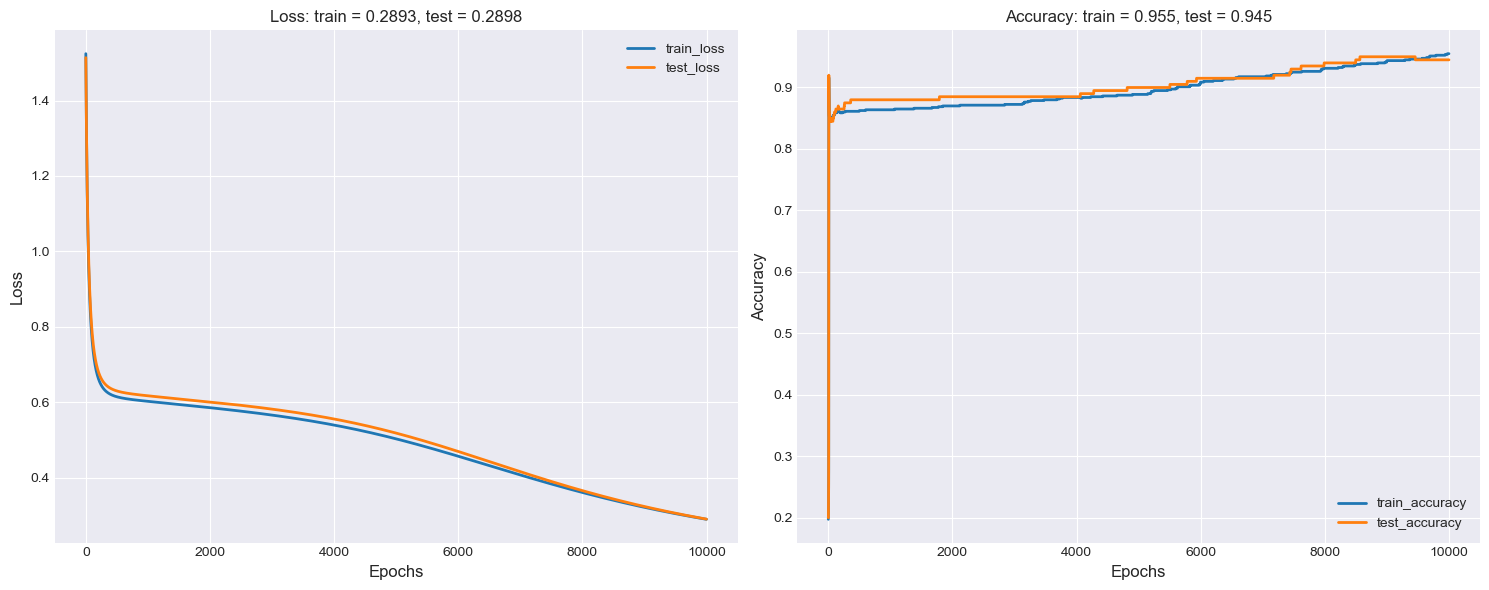

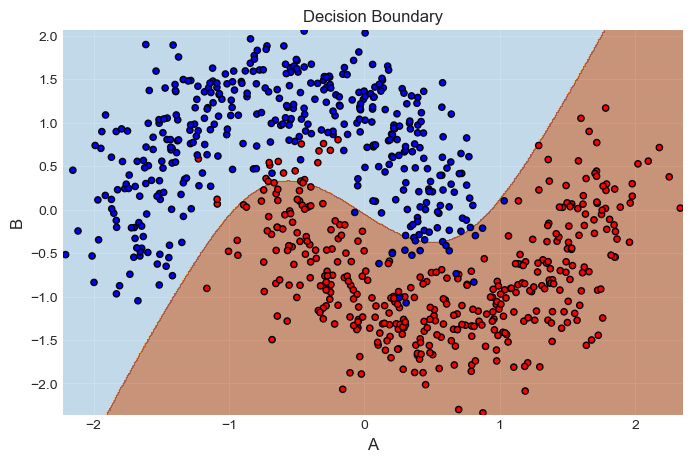

In [140]:
one_hidden_layer_perceptron(random_seed=1, learning_rate=0.01,
                            n_epochs=10000, n_hidden_neurons=50)

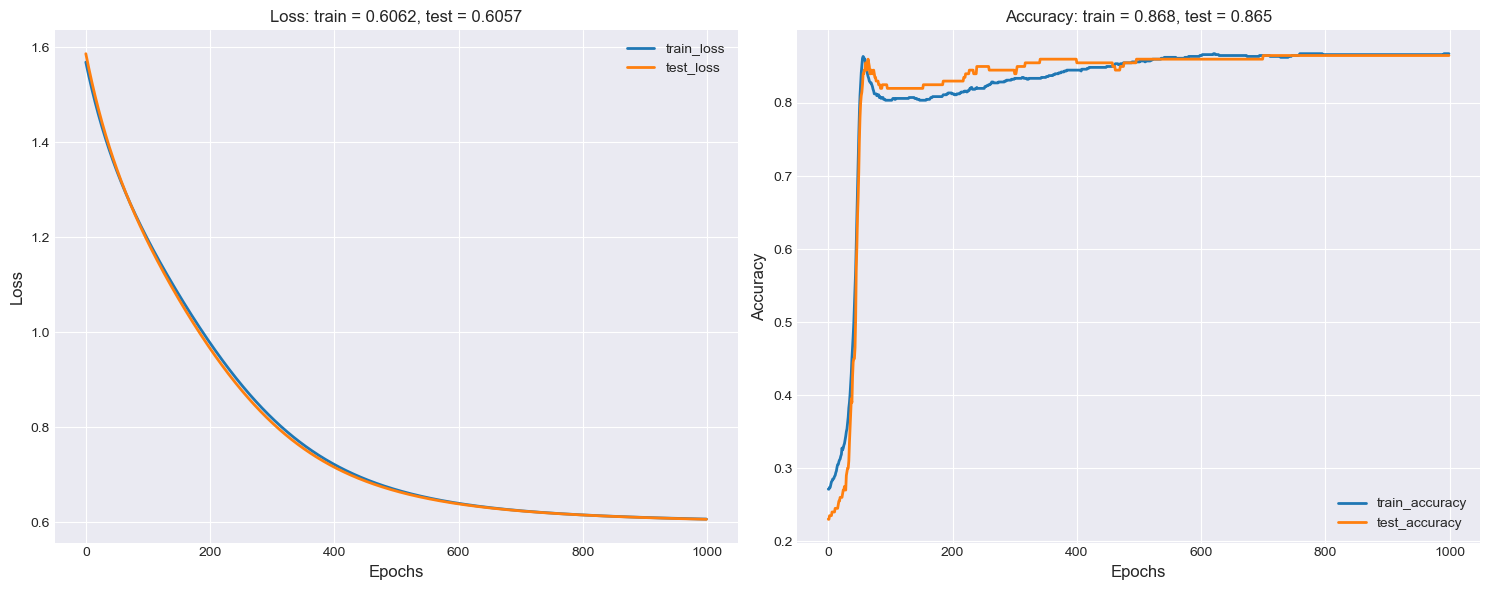

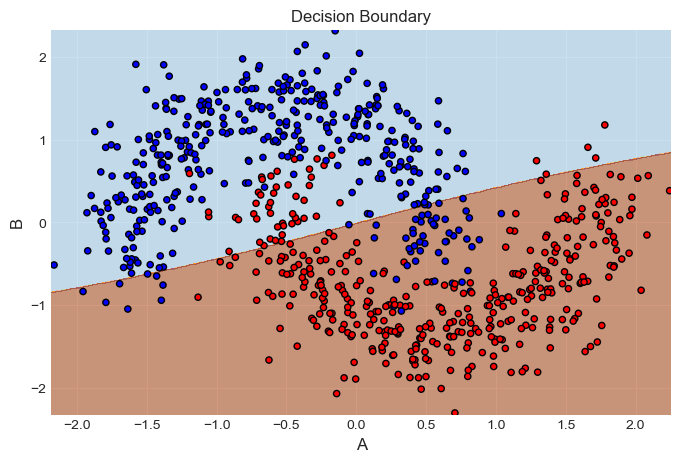

In [141]:
one_hidden_layer_perceptron(random_seed=42, learning_rate=0.01,
                            n_epochs=1000, n_hidden_neurons=10)

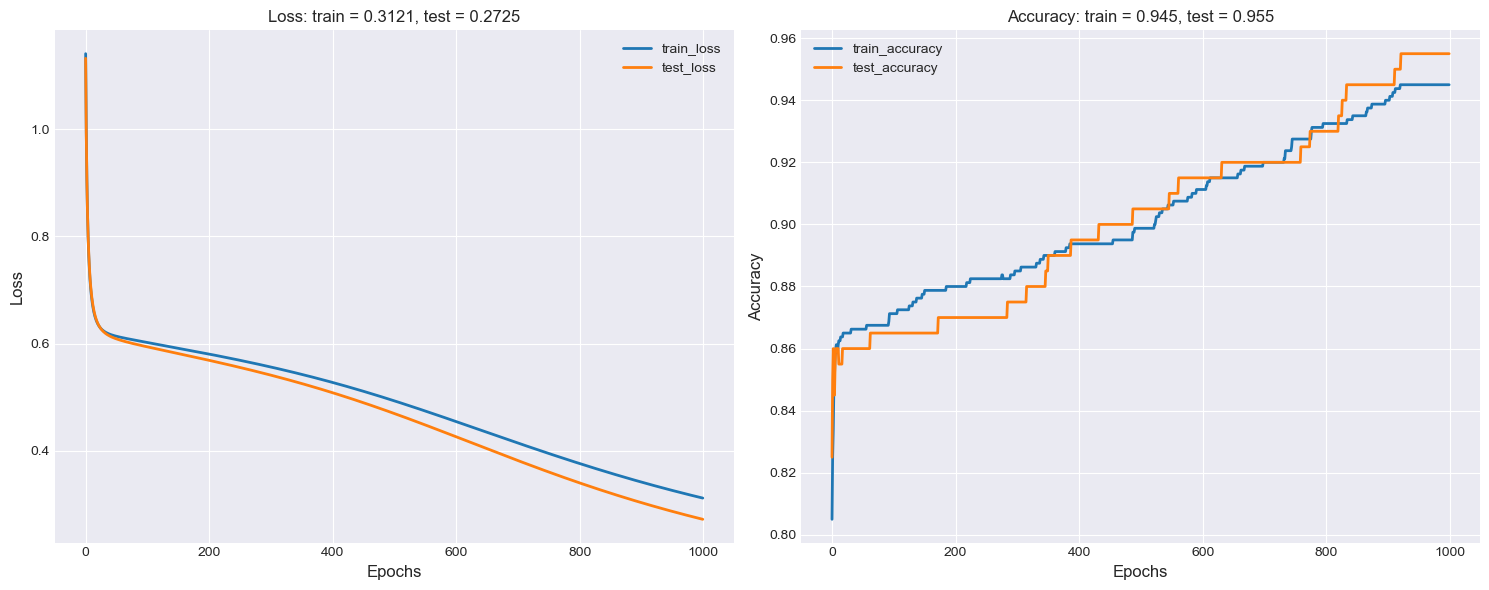

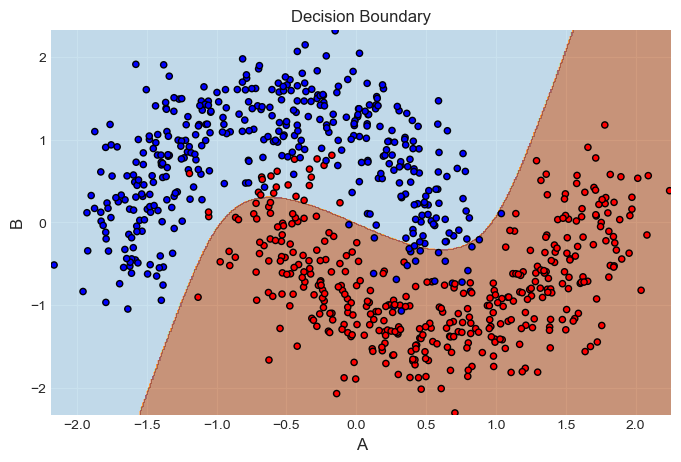

In [142]:
one_hidden_layer_perceptron(random_seed=42, learning_rate=0.1,
                            n_epochs=1000, n_hidden_neurons=100)

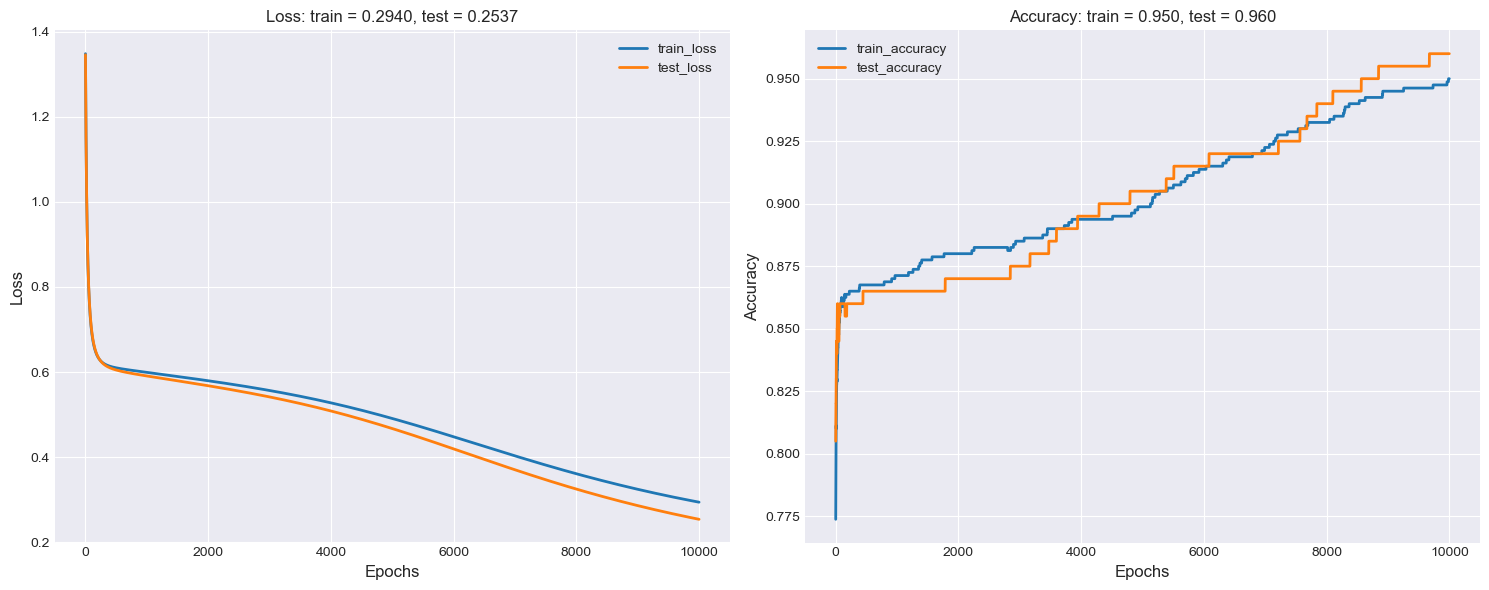

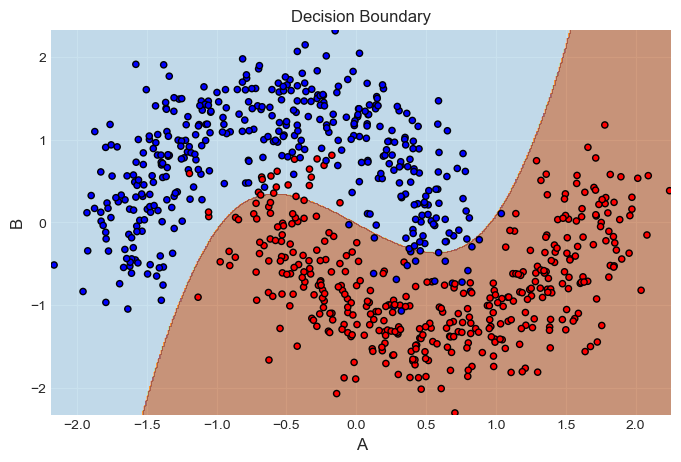

In [143]:
one_hidden_layer_perceptron(random_seed=42, learning_rate=0.01,
                            n_epochs=10000, n_hidden_neurons=100)

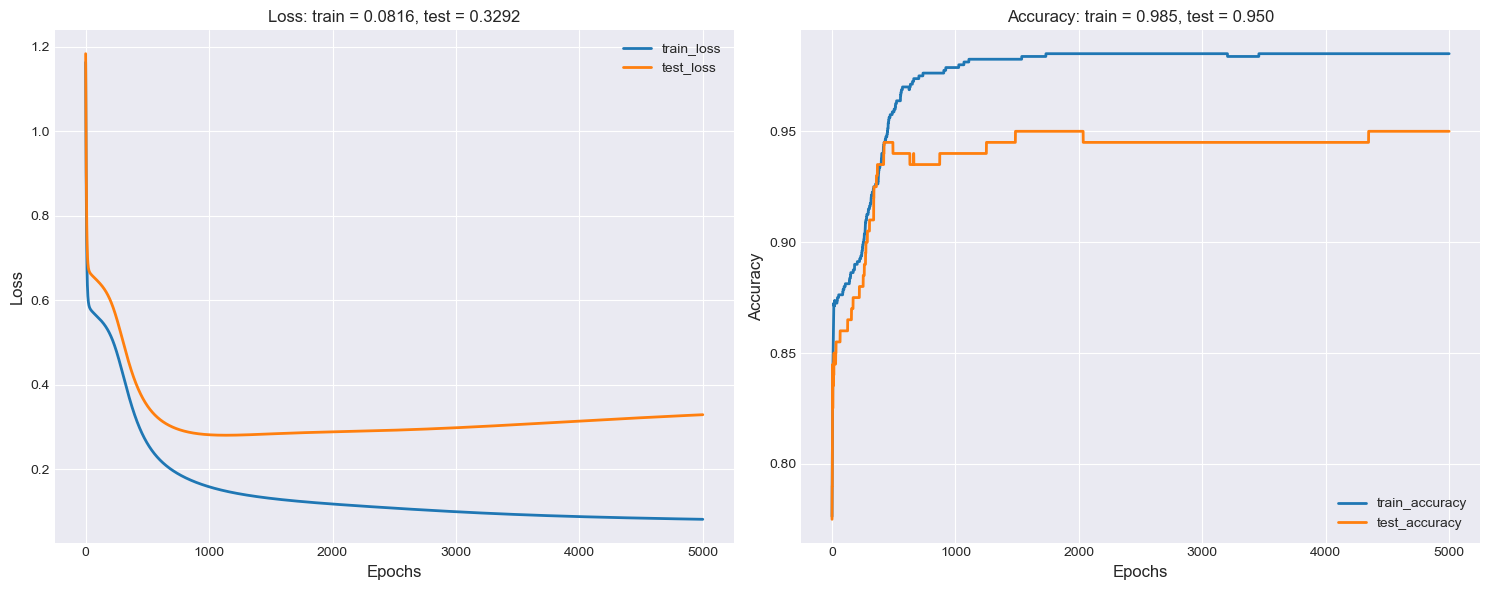

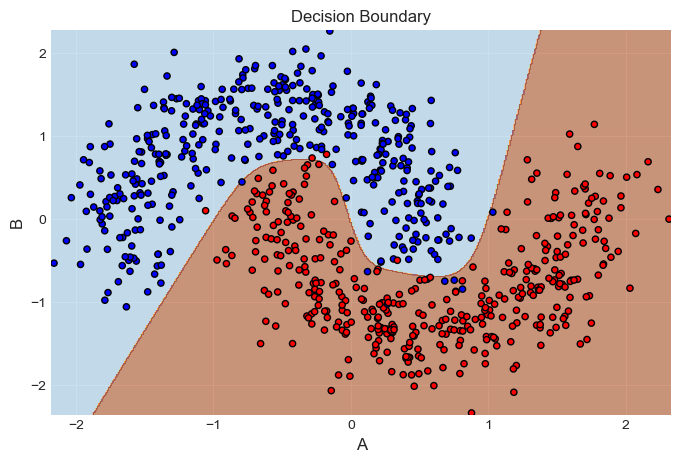

In [144]:
one_hidden_layer_perceptron(random_seed=999, learning_rate=0.3,
                            n_epochs=5000, n_hidden_neurons=10)

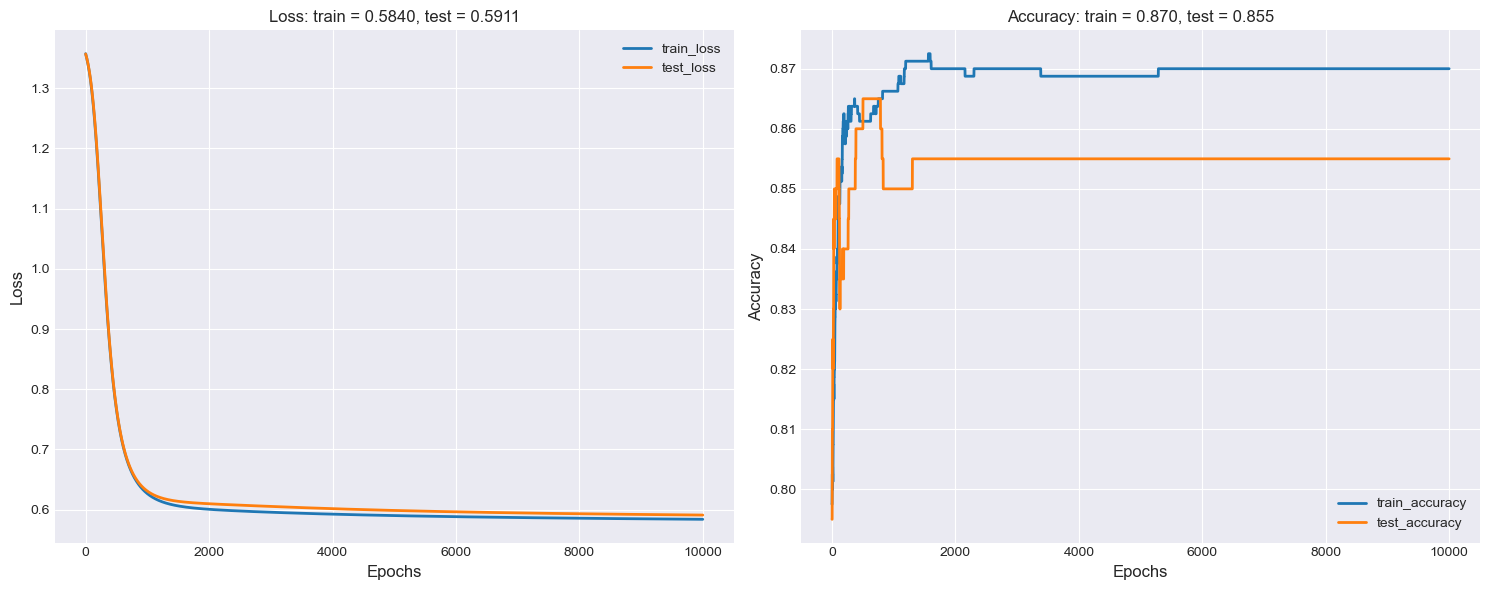

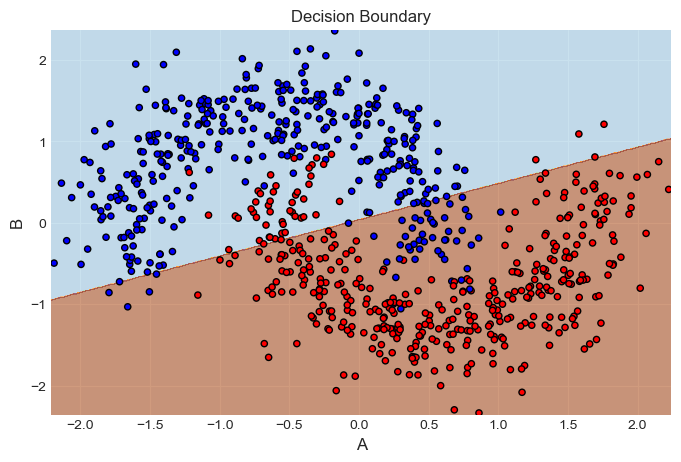

In [145]:
one_hidden_layer_perceptron(random_seed=101, learning_rate=0.01,
                            n_epochs=10000, n_hidden_neurons=2)

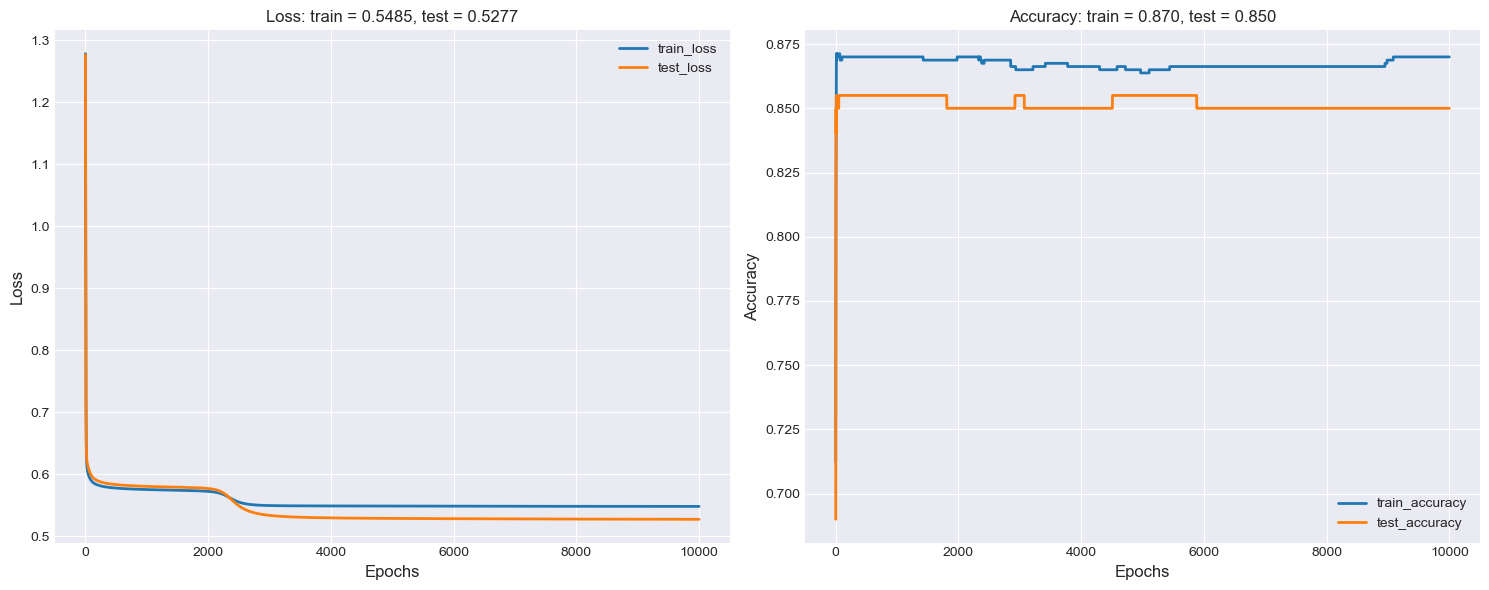

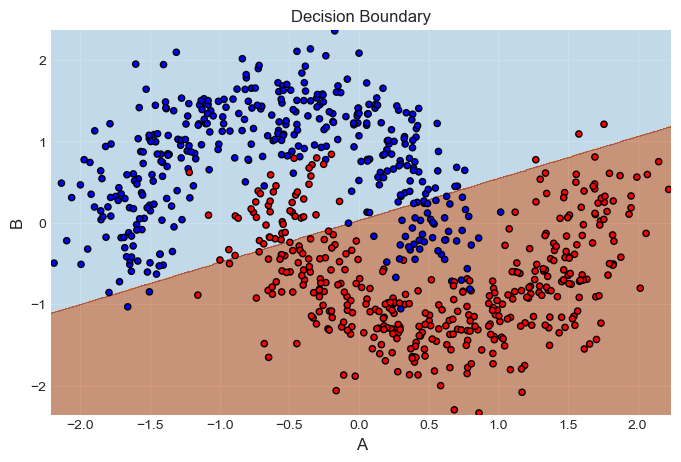

In [146]:
one_hidden_layer_perceptron(random_seed=101, learning_rate=0.6,
                            n_epochs=10000, n_hidden_neurons=2)

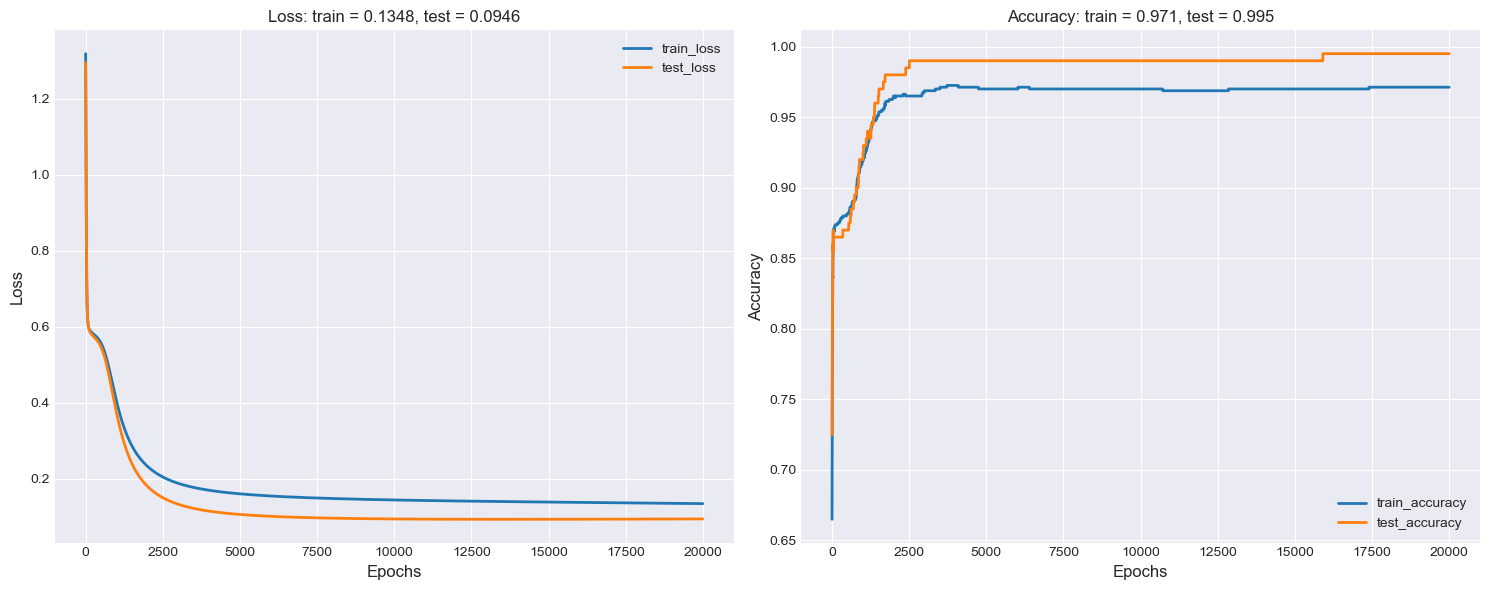

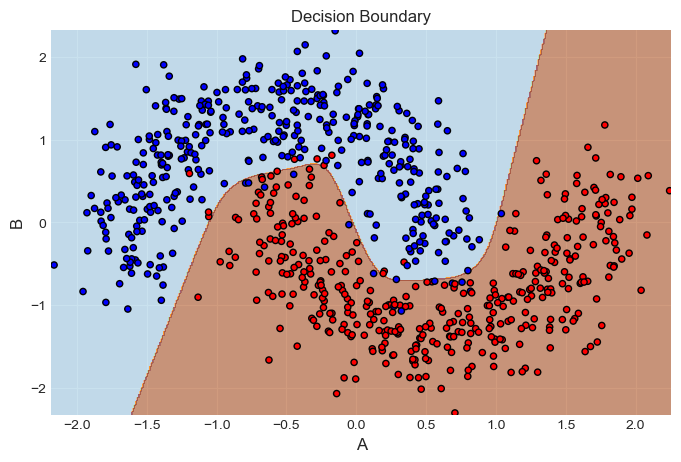

In [147]:
one_hidden_layer_perceptron(random_seed=42, learning_rate=0.1,
                            n_epochs=20000, n_hidden_neurons=10)

### Assignment - Answer all Questions
- **Q1**: Is this model more accurate compared to previous model? <br>
Ans.: Yes, but subject to conditions. The model does not always give non-linear boundary even for more than one neurons in the hidden layer. It depends on variety of parameters like learning rate, number of epochs, number of neurons, and random state as well. But mostly, we are able to get a non-linear decision boundary matching with our non-linear data. So this is usually better.

- **Q2**: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results. <br>
Ans.:
Observations

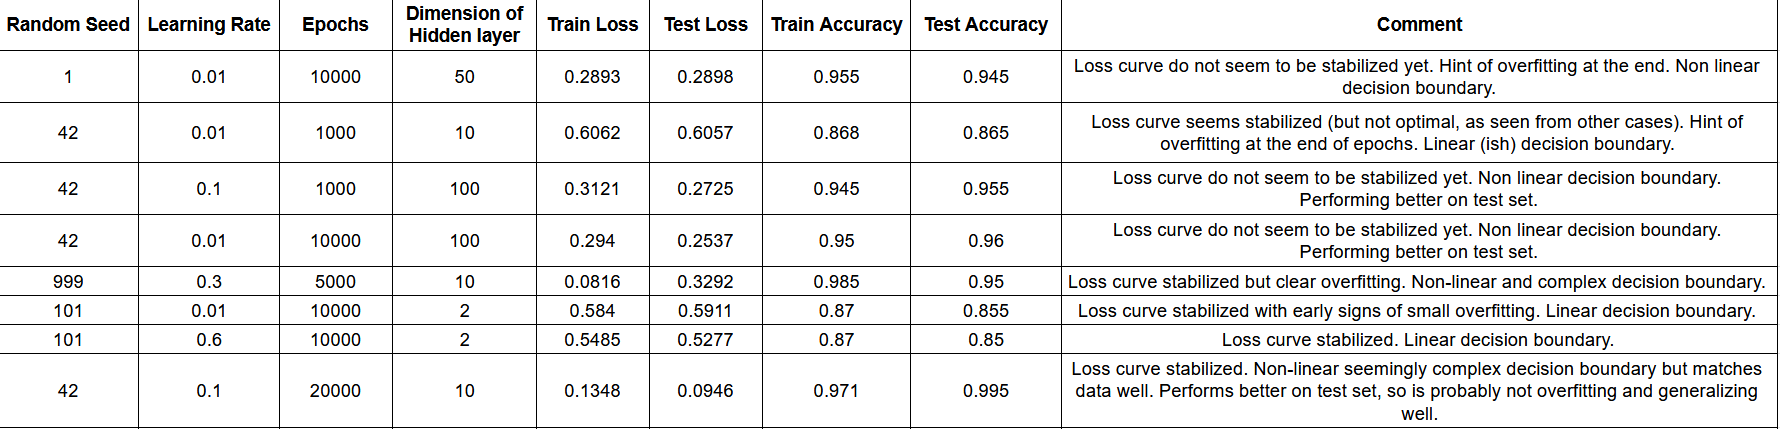

We see that if we increase the learning rate, the model is able to progress faster but it might not lead to better loss function output (i.e. lower). If epochs are less, model is not able to learn the patterns in time and we get a linear decision boundary. If epochs are more, we can get overfitting, specially for high learning rate. 

We also see that case having more number of neurons with less number of epochs is outperformed by model having lesser neurons in the hidden layer but more number of epochs at the same learning rate. So there is not a single decisive factor in creating the best model and we need to look at all these hyperparameters.